# Section 3 introduces you to Random Variables, Sampling Models, and the Central Limit Theorem.

Section 3 is divided into two parts:

Random Variables and Sampling Models
The Central Limit Theorem.
After completing Section 3, you will:

understand what random variables are, how to generate them, and the correct mathematical notation to use with them.
be able to use sampling models to estimate characteristics of a larger population.
be able to explain the difference between a distribution and a probability distribution.
understand the Central Limit Theorem and the law of large numbers.

In [38]:
using StatsBase
using Plots
using StatsPlots

Being able to quantify the uncertainty introduced by randomness
is one of the most important jobs of a data scientist.


 Many data-generation procedures,
those that produce data that we study, can be modeled
quite well as draws from an urn.
For example, we can model the process of polling likely voters as drawing 0's--
Republicans-- and 1's--
Democrats-- from an urn containing the 0 and 1 code for all likely voters.
We'll see that in more detail later.
In epidemiological studies, we often assume that the subjects in our study
are a random sample from the population of interest.
The data related to a specific outcome can be modeled as a random sample
from an urn containing the values for those outcomes
for the entire population of interest.
Similarly, in experimental research, we often assume that the individual
organisms we are studying-- for example, worms, flies, or mice--
are a random sample from a larger population.
Randomized experiments can also be modeled by draws from urn,
given the way individuals are assigned to groups.
When getting assigned, you draw your group at random.
Sampling models are therefore ubiquitous in data science.
Casino games offer a plethora of examples of real-world situations
in which sampling models are used to answer specific questions.
We will therefore start with such examples.


## roulette wheel.

OK, let's start with this.
Suppose a very small casino hires you to consult on
whether they should set up a roulette wheel.
They want to know if they can make money off it, or if it's too risky
and they might lose.
To keep the example simple, we will assume that 1,000 people will play,
and that the only game you can play is to bet on red or black.
The casino wants to predict how much money they will make or lose.
They want a range of values that are possible,
and in particular, they want to know, what is the chance of losing money?
If this probability is too high, they will
pass on installing roulette wheels, since they
can't take the risk, given that they need to pay their employees
and keep the lights on.
We're going to define a random variable, capital S, that will
represent the casino's total winnings.
Let's start by constructing the urn, the urn we use for our sampling model.
A roulette wheel has 18 red pockets, 18 black pockets, and 2 green ones.
So playing a color in one game of roulette
is equivalent to drawing from this urn.

In [39]:
# construct an Urn corresponding to the colors in the wheel.
# The urn will have 18 red balls, 18 black balls, 2 green balls
# We will use a vector to represent the Urn

red = fill("red", 18) # 18 red balls
black = fill("black", 18) # 18 black balls
green = fill("green", 2) # 2 green balls
urn = vcat(red, black, green) # concatenate the vectors

38-element Vector{String}:
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 ⋮
 "black"
 "black"
 "black"
 "black"
 "black"
 "black"
 "black"
 "green"
 "green"

In [40]:
"""
    rep(items:: Any, counts:: Any)

Build a sample vector based on a specific pattern. This function repeats each item in the 'items' array 
according to the corresponding count in the 'counts' array.

# Arguments
- `items:: Any`: An array of items that need to be repeated.
- `counts:: Any`: An array of counts specifying how many times each item in 'items' should be repeated.

# Returns
- `Array{Any, 1}`: An array that contains the repeated items according to the specified pattern.

# Examples
```julia-repl
julia> rep(["red", "black", "green"], [18, 18, 2])
```
38-element Array{String,1}:
 "red"
 "red"
 ⋮
 "green"
 "green"
"""
function rep(items:: Any, counts)
    vcat([fill(items[i], counts[i]) for i in 1:length(items)]...)
end


"""
    @rep items counts

A macro to call the `rep` function. This macro simplifies the syntax needed to call the `rep` function. 

# Arguments
- `items`: An array of items that need to be repeated.
- `counts`: An array of counts specifying how many times each item in 'items' should be repeated.

# Returns
- `Array{Any, 1}`: An array that contains the repeated items according to the specified pattern.

# Examples
```julia-repl
julia> @rep ["red", "black", "green"] [18, 18, 2]
38-element Array{String,1}:
 "red"
 "red"
 ⋮
 "green"
 "green"
 ```
"""
macro rep(items, counts)
    quote
        rep($items, $counts)
    end
end




@rep

In [41]:
color = @rep ["red", "black", "green"] [18, 18, 2]

38-element Vector{String}:
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 "red"
 ⋮
 "black"
 "black"
 "black"
 "black"
 "black"
 "black"
 "black"
 "green"
 "green"

The 1,000 outcomes from 1,000 people playing
are independent draws from this urn.
If red comes up, the gambler wins, and the casino loses $1,
so we draw a negative 1.
Otherwise, the casino wins $1, and we draw a 1.
We can code 1,000 independent draws using the following code.

In [42]:
# The 1,000 outcomes from 1,000 people playing
# are independent draws from this urn.
# If red comes up, the gambler wins, and the casino loses $1,
# so we draw a negative 1.
# Otherwise, the casino wins $1, and we draw a 1.
# We can code 1,000 independent draws using the following code.

# 1,000 draws from the color

draws = rand(color, 1000);

X = [draw == "red" ? -1 : 1 for draw in draws]

1000-element Vector{Int64}:
 -1
 -1
  1
 -1
  1
 -1
  1
  1
 -1
  1
  ⋮
  1
  1
 -1
  1
  1
 -1
 -1
 -1
  1

In [43]:
# Now we can compute the proportions cassino wins and loses

mean(X .== 1) # cassino wins proportions


0.511

In [44]:
mean(X .== -1) # cassino loses proportions, this is around 9/19

0.489

In [45]:
# Because we know the proportions of 1s and -1s, we can generate the draws with one line of
# code, without defining color:

X_draws = StatsBase.sample([-1, 1], Weights([9/19, 10/19]), 1000, replace = true)

1000-element Vector{Int64}:
 -1
 -1
  1
  1
  1
 -1
 -1
 -1
  1
  1
  ⋮
  1
 -1
  1
  1
 -1
 -1
 -1
 -1
 -1

This expression is calling the sample function from the StatsBase package. Here's what each of the arguments is doing:

[-1, 1]: This is the collection that we're sampling from. It's an array with two elements: -1 and 1.

Weights([9/19, 10/19]): This is specifying the probabilities (or weights) associated with each element in the collection. The Weights function is used to create a Weights object, which the sample function understands. The first element of the array (corresponding to -1) has a weight of 9/19, and the second element (corresponding to 1) has a weight of 10/19. This means that, on average, in a large number of samples, -1 would be chosen 9/19 of the time and 1 would be chosen 10/19 of the time.

1000: This is the number of elements to sample. So the function will return an array of 1000 elements, each of which is either -1 or 1.

replace = true: This is specifying that we're sampling with replacement. That means that after an element is chosen, it's put back into the collection and could be chosen again. In this case, it means that the same number (-1 or 1) could be chosen multiple times in the 1000 samples.

So overall, this expression is generating an array of 1000 elements, where each element is either -1 or 1. The probability of -1 appearing is 9/19, and the probability of 1 appearing is 10/19. The same number could appear multiple times in a row, because we're sampling with replacement.

In [46]:
mean(X_draws .== 1) # cassino wins proportions

0.544

In [47]:
mean(X_draws .== -1) # cassino loses proportions, this is around 9/19

0.456

We call this a **sampling model** since we are modeling the random behavior of roulette
with the sampling of draws from an urn

## Probability Distribution of a Random Variable

In [48]:
S = sum(X_draws)

88

If you run the code above, you see that S changes every time. This is, of course, because
S is a random variable. The probability distribution of a random variable tells us the
probability of the observed value falling at any given interval. So, for example, if we want
to know the probability that we lose money, we are asking the probability that S is in the
interval S < 0.
Note that if we can define a cumulative distribution function F(a) = Pr(S ≤ a), then we will
be able to answer any question related to the probability of events defined by our random
variable S, including the event S < 0. We call this F the random variable’s distribution
function.
We can estimate the distribution function for the random variable S by using a Monte Carlo
simulation to generate many realizations of the random variable. With this code, we run
the experiment of having 1,000 people play roulette, over and over, specifically B = 10, 000
times:

In [49]:
n = 1000
B = 30000







30000

In [50]:
roulette_winnings(n) = sum(StatsBase.sample([-1, 1], Weights([9/19, 10/19]), n, replace = true)) 

roulette_winnings (generic function with 1 method)

In [51]:
S = [roulette_winnings(n) for _ in 1:B]

30000-element Vector{Int64}:
  32
  14
  54
 106
  52
  82
 108
  72
  80
  30
   ⋮
  48
  -6
  50
  -4
  78
  58
  76
  28
  62

In [52]:
roulette_winnings(100)

18

In [53]:

"""
    replicate(B, f, args...)

Replicate the execution of a function `f` with provided arguments `args...` a specified number of times `B`, 
returning an array of the results. This is similar to the `replicate` function in R.

# Arguments
- `B`: The number of times to replicate the function.
- `f`: The function to be replicated.
- `args...`: The arguments to pass to the function `f`.

# Returns
- `Array`: An array containing the results of each function call.

# Examples
```jldoctest
julia> replicate(5, rand, 1:6)
5-element Array{Int64,1}:
 3
 6
 4
 5
 2
 ```
"""
function replicate(B, f, args...)
    return [f(args...) for _ in 1:B]
end



"""
@replicate B f(args...)

A macro to call the replicate function. This macro simplifies the syntax needed to call the replicate function.

Arguments
B: The number of times to replicate the function.
f: The function to be replicated.
args...: The arguments to pass to the function f.
Returns
Array: An array containing the results of each function call.
Examples
jldoctest
Copy code
julia> @replicate 5 rand(1:6)
5-element Array{Int64,1}:
 1
 3
 5
 2
 6
"""
macro replicate(B, f, args...)
    quote
        replicate($B, $f, $args...)
    end
end


@replicate

In [54]:
S = @replicate 30000 roulette_winnings 1000

30000-element Vector{Int64}:
   4
  30
 106
  38
  34
  56
  -8
  98
  52
  62
   ⋮
  92
  16
  68
  66
  34
  44
  74
  12
   2

Now we can ask the following: in our simulations, how often did we get sums less than or
equal to a?
mean(S <= a)

This will be a very good approximation of F(a) and we can easily answer the casino’s
question: how likely is it that we will lose money? We can see it is quite low:

In [55]:
mean(S .< 0.00)

0.0439

We can visualize the distribution of S by creating a histogram showing the probability
F(b) − F(a) for several intervals (a, b]:


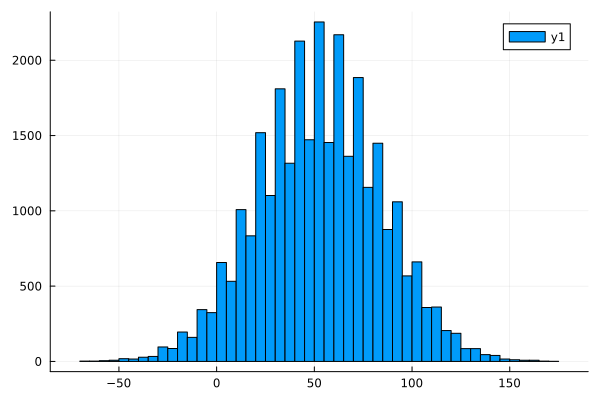

In [56]:
histogram(S)

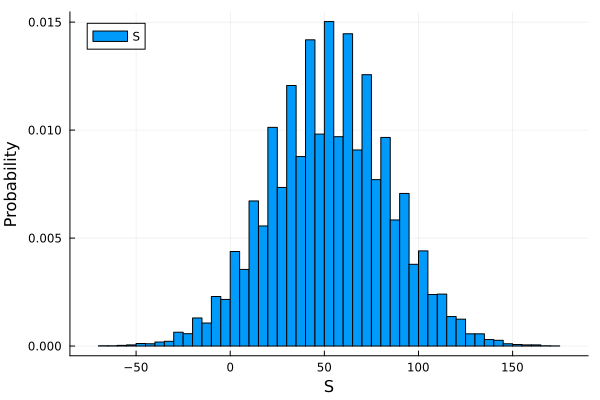

In [60]:
# plot of probability distribution of S
histogram(S, normalize = :pdf, label = "S", legend = :topleft, xlabel = "S", ylabel = "Probability")



We see that the distribution appears to be approximately normal. A qq-plot will confirm
that the normal approximation is close to a perfect approximation for this distribution. If,
in fact, the distribution is normal, then all we need to define the distribution is the average
and the standard deviation. Because we have the original values from which the distribution
is created, we can easily compute these with mean(S) and sd(S). The blue curve you see
added to the histogram above is a normal density with this average and standard deviation.
This average and this standard deviation have special names. They are referred to as the
expected value and standard error of the random variable S. We will say more about these
in the next section.

Let's break it down:

"Statistical theory provides a way to derive the distribution of random variables defined as independent random draws from an urn."

This is saying that if you're drawing random variables independently (i.e., the result of one draw doesn't affect the others), there's a well-defined way to describe the distribution of these variables. This is analogous to drawing balls from an urn with replacement.

"Specifically, in our example above, we can show that (S + n)/2 follows a binomial distribution."

In the context of the roulette simulation you ran earlier, S is the sum of all the roulette results (each of which is -1 or 1), and n is the total number of bets. The expression (S + n)/2 essentially counts the number of wins (results of 1) in the game. This count follows a binomial distribution, which describes the number of successes in a fixed number of independent Bernoulli trials (with the same probability of success).

"We therefore do not need to run Monte Carlo simulations to know the probability distribution of S. We did this for illustrative purposes."

Monte Carlo simulations are a way to estimate probabilities by running many trials and seeing what fraction of them result in a given outcome. However, in this case, because we know the exact distribution that (S + n)/2 follows (a binomial distribution), we don't need to run simulations to know the probabilities -- we can calculate them directly.

"We can use the function dbinom and pbinom to compute the probabilities exactly."

dbinom and pbinom are functions in R for computing probabilities related to the binomial distribution. dbinom gives the probability mass function (the probability of a specific outcome), and pbinom gives the cumulative distribution function (the probability of an outcome less than or equal to a given value).

"For example, to compute Pr(S < 0) we note that: Pr(S < 0) = Pr((S + n)/2 < (0 + n)/2) and we can use the pbinom to compute Pr(S ≤ 0)"

This is showing how to translate a probability involving S into a probability involving (S + n)/2, which follows a binomial distribution. The inequality (S + n)/2 < (0 + n)/2 simplifies to (S + n)/2 < n/2, which is the condition for having less than n/2 wins in the game. The probability of this can be calculated with pbinom.

So, overall, this passage is explaining that because the number of wins in the game follows a binomial distribution, we can calculate probabilities directly rather than needing to estimate them with simulations.

The binomial distribution and the normal distribution are different types of probability distributions, and they aren't interchangeable. However, they are related in a specific way: the normal distribution can be used as an approximation of the binomial distribution under certain conditions.

A binomial distribution is discrete and is used when you have a fixed number of independent trials each with a constant probability of success. The binomial distribution's parameters are n (the number of trials) and p (the probability of success on each trial).

On the other hand, the normal distribution is a continuous distribution and is often used as an approximation for the binomial distribution when n is large and/or when np and n(1-p) are both large.

In these cases, a binomial distribution with parameters n and p can be approximated by a normal distribution with mean μ = np and variance σ² = np(1-p). This is a consequence of the Central Limit Theorem, which states that the sum of a large number of independent and identically distributed random variables will be approximately normally distributed.

So, when you say that the histogram of S follows a "normal" distribution, it suggests that the conditions are being met to approximate the binomial distribution with a normal distribution.

It's important to remember though that the normal approximation is just that - an approximation. The actual underlying distribution is still binomial, and the approximation will not be perfect, especially for values near the tails or when the conditions for the approximation aren't well-met